<h1>Rede neural para classificar imagens de números </h1>

In [37]:
import keras
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("First 5 training labels: ", y_train[:5])

First 5 training labels:  [5 0 4 1 9]


<h1> tratamento dos dados </h1>
<p> Antes de tudo, vamos colocar cada imagem com sua respectiva categoria de um jeito que a categoria seja representada por uma posição no array. Por exemplo, se a imagem foi classificada como o número 5, então a categoria é um array marcando 1 na posição 5.

Isso serve para saber o quão longe está da predição correta. Se o número 8 foi visto como número 0, é um erro maior do que o número 8 ser confundido com o 7
</p>

In [38]:
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)







In [50]:
image_vector_size = 28*28
x_train = x_train.reshape(x_train.shape[0], image_vector_size)
x_test = x_test.reshape(x_test.shape[0], image_vector_size)

In [51]:
print(y_train.shape) 

(60000, 10)


In [52]:
print(y_train[:5])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [53]:
from keras.layers import Dense # camadas completamente conectadas
from keras.models import Sequential # https://keras.io/models/sequential/

In [54]:

image_size = 28*28
model = Sequential()

model.add(Dense(units=32, activation='sigmoid', input_shape=(image_size,)))
model.add(Dense(units=num_classes, activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_9 (Dense)              (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


<p>No modelo acima, temos uma camada oculta com 32 neurônios.

   A camada de saída possui 10 neurônios
</p>

In [62]:
import matplotlib.pyplot as plt

model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=128, epochs=5, verbose=False, validation_split=.1)
loss, accuracy  = model.evaluate(x_test, y_test, verbose=False)



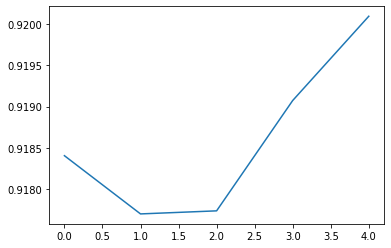

In [66]:
plt.plot(history.history['accuracy'])